# APPM 4600: Homework 5
## Kevin Stull
### Problem 1
a)

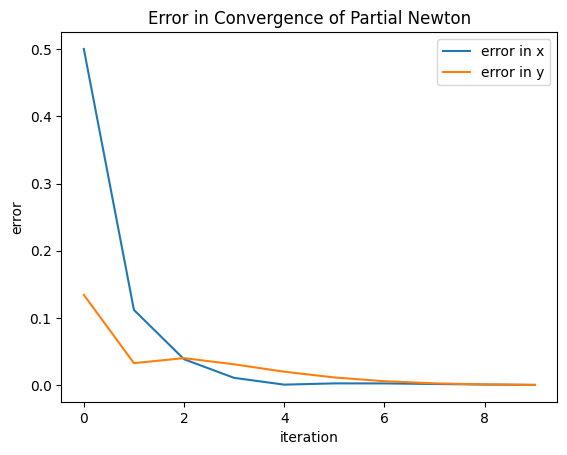

converges to: [0.49935235 0.86578851]


In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  return 3*args[0]**2 - args[1]**2

def g(args):
  return 3*args[0]*args[1]**2 - args[0]**3 - 1

# parameters
x0 = 1
y0 = 1
J = np.array([[1/6, 1/18],[0, 1/6]])
nMax = 10
y = np.zeros([2,nMax])
y[:,0] = np.array([x0, y0])

# calculating sequences
for i in range(1, nMax):
  y[:,i] = y[:,i-1] - (J @ np.array([f(y[:,i-1]), g(y[:, i-1])]))

# calculating convergence behavior
e = np.zeros([2,nMax])
for i in range(nMax):
  e[0, i] = abs(y[0, i] - y[0, -1])
  e[1, i] = abs(y[1, i] - y[1, -1])

# displaying convergence behavior
plt.plot(range(nMax), e[0,:], label='error in x')
plt.plot(range(nMax), e[1,:], label='error in y')
plt.title("Error in Convergence of Partial Newton")
plt.xlabel('iteration')
plt.ylabel('error')
plt.legend()
plt.show()
print("converges to:", y[:,-1])


It appears to converge to x = 0.5, y = 0.866 at a super-linear rate.

b) The matrix chosen above is the inverse of the Jacobian, which provides derivative information about the functions from which the iteration was derived.

c)

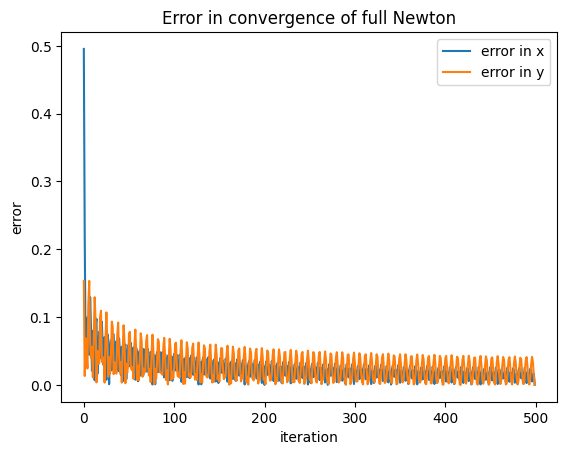

converges to: [0.5045002  0.84655336]


In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  return 3*args[0]**2 - args[1]**2

def g(args):
  return 3*args[0]*args[1]**2 - args[0]**3 - 1

def J(args):
  x = args[0]
  y = args[1]
  J_norm = (30*(x**2)*y + 6*y**3)**(-1)
  a = 6*x*y
  b = -2*y
  c = (3*y**2) - 3*x**2
  d = 6*x*y
  return np.array([[a*J_norm, b*J_norm],[c*J_norm, d*J_norm]])

# parameters
x0 = 1
y0 = 1
nMax = 500
y = np.zeros([2,nMax])
y[:,0] = np.array([x0, y0])

# calculating sequences
for i in range(1, nMax):
  y[:,i] = y[:,i-1] - (J(y[:, i-1]) @ np.array([f(y[:,i-1]), g(y[:, i-1])]))

# calculating convergence behavior
e = np.zeros([2,nMax])
for i in range(nMax):
  e[0, i] = abs(y[0, i] - y[0, -1])
  e[1, i] = abs(y[1, i] - y[1, -1])

# displaying convergence behavior
plt.plot(range(nMax), e[0,:], label='error in x')
plt.plot(range(nMax), e[1,:], label='error in y')
plt.title("Error in convergence of full Newton")
plt.xlabel('iteration')
plt.ylabel('error')
plt.legend()
plt.show()
print("converges to:", y[:,-1])


It appears that it does not fully converge, is oscillates around values near the zeros.

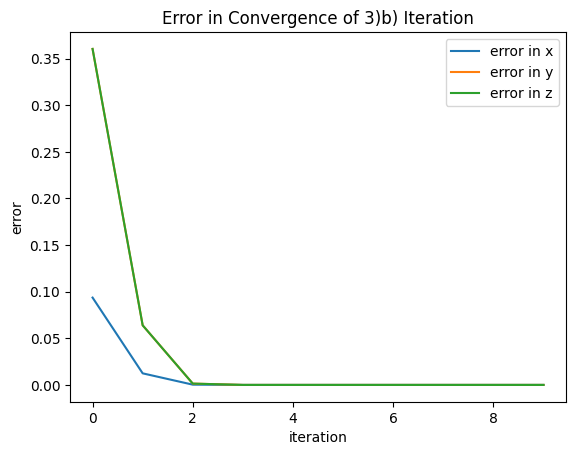

converges to: [1.09364232 1.36032838 1.36032838]


In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# functions
def f(args):
  x = args[0]
  y = args[1]
  z = args[2]
  return x**2 + 4*y**2 + 4*z**2 - 16

def fx(args):
  return 2*args[0]

def fy(args):
  return 8*args[1]

def fz(args):
  return 8*args[2]

def d(args):
  return f(args) / (fx(args)**2 + fy(args)**2 + fz(args)**2)

def helper(args):
  return np.array([fx(args), fy(args), fz(args)])

# parameters
x0 = 1
y0 = 1
z0 = 1
nMax = 10
y = np.zeros([3,nMax])
y[:,0] = np.array([x0, y0, z0])

# calculating sequences
for i in range(1, nMax):
  y[:,i] = y[:,i-1] - d(y[:,i-1])*helper(y[:,i-1])

# calculating convergence behavior
e = np.zeros([3,nMax])
for i in range(nMax):
  e[0, i] = abs(y[0, i] - y[0, -1])
  e[1, i] = abs(y[1, i] - y[1, -1])
  e[2, i] = abs(y[2, i] - y[2, -1])

# displaying convergence behavior
plt.plot(range(nMax), e[0,:], label='error in x')
plt.plot(range(nMax), e[1,:], label='error in y')
plt.plot(range(nMax), e[2,:], label='error in z')
plt.title("Error in Convergence of 3)b) Iteration")
plt.xlabel('iteration')
plt.ylabel('error')
plt.legend()
plt.show()
print("converges to:", y[:,-1])

This convergence appears to be quadratic in all three variables.